# **Analysis of US Gun Violence Incidents from 2013 - 2017**

### ***Nandini Venkatesh, Sheral and Radhika Patel***

## INTRODUCTION

Some BS on Gun Violence ... 
- how it impacts the country's politics
- why its important to analyze the data for it
- what can we get out of analyzing gun violence data

## DATA COLLECTION

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Here we are reading our main csv file containing data on shootings in the US from 2013 to 2018. We skipped several columns that we deemed were unnecessary for our data analysis such as any of the *url* columns, did not provide concise information such as *location_description*, or had several rows of missing data, which were specifically ones related to describing guns found the these incidents. 

In [197]:
cols = list(pd.read_csv("stage3.csv", nrows =1))
df_2017= pd.read_csv("stage3.csv")
df_2017 = df_2017.drop(columns = ['incident_url', 'source_url', 'incident_url_fields_missing', 
                        'gun_stolen', 'gun_type', 'location_description', 'notes', 'n_guns_involved', 'sources'])
df_2017.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,1.0,"Shot - Dead (murder, accidental, suicide)||Hom...",36.2405,-95.9768,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,"Shot - Dead (murder, accidental, suicide)||Mas...",34.9791,-106.7160,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,2.0,Shot - Wounded/Injured||Drive-by (car to stree...,29.9435,-90.0836,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,9.0,Shot - Wounded/Injured||Drive-by (car to stree...,37.9656,-121.7180,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,7.0,"Shot - Wounded/Injured||Shot - Dead (murder, a.

We convert our date column to a datetime and remove data on shootings after 2017 since data for the year 2018 is incomplete. We also create another dataframe containing shootings from 2017.

In [196]:
df_2017.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'latitude', 'longitude', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_name', 'participant_relationship',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [42]:
df_2017["date"] = pd.to_datetime(df_2017["date"])
df_2013_2018 = df_2017.iloc[:-13802]
df_2017 = df_2017.iloc[164474:]
df_2017 = df_2017.iloc[:-13802]
df_2013_2018.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district


Here we are parsing columns that include attributes of multiple people involved in a particular incident, for example, participant_age, participant_age_group, and participant_type. Each person is separated by a '||' and the attributes are separated by '::' and are then added to a dictionary, the key being the person's numerical and the value being the attribute. This is being changed in a new dataframe df_age, which includes the parsed values of these columns.

In [39]:
df_age = df_2017.dropna(subset =['participant_age'])

def splitting(x):
    x = x.split('||')
    dict = {}
    for y in x: 
        y = y.split("::")
        dict[int(y[0])] = int(y[1])
    return dict
    
def splitting_group(x):
    x = str(x).split('||')
    dict = {}
    for y in x:
        y = y.split("::")
        if len(y) == 2:
            dict[int(y[0])] = y[1]
    return dict

df_age['participant_age'] = df_age['participant_age'].apply(splitting)
df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
df_age['participant_type'] = df_age['participant_type'].apply(splitting_group)
df_age

<ipython-input-39-9df39c6adda2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age'] = df_age['participant_age'].apply(splitting)
<ipython-input-39-9df39c6adda2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['participant_age_group'] = df_age['participant_age_group'].apply(splitting_group)
<ipython-input-39-9df39c6adda2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,woman shot and killed when men in vehicle fire...,"{0: 18, 1: 17, 2: 22}","{0: 'Adult 18+', 1: 'Teen 12-17', 2: 'Adult 18+'}",0::Female||1::Male||2::Male,0::Kiara Tatum||1::Jaylen Clayton||2::Devante ...,NaN,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",91.0,33.0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,Celebratory gunfire.,{0: 25},{0: 'Adult 18+'},0::Male,0::Kareebo Adams,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},NaN,11.0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,NaN,"{0: 23, 1: 17}","{0: 'Adult 18+', 1: 'Teen 12-17'}",0::Female||1::Male,0::Ana Manriquez,NaN,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,5.0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,NaN,"{0: 61, 1: 71}","{0: 'Adult 18+', 1: 'Adult 18+'}",0::Female||1::Male,NaN,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,"East End near Mechanicsville Turnpike, man sho...",{0: 18},{0: 'Adult 18+'},0::Male,NaN,NaN,0::Injured,{0: 'Victim'},71.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,NaN,{0: 16},{0: 'Teen 12-17'},0::Male,NaN,NaN,0::Injured,{0: 'Victim'},67.0,23.0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,"Traffic stop finds man w/ suspended license, e...",{0: 22},{0: 'Adult 18+'},0::Male,0::Jared E Mayes,NaN,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},67.0,34.0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,NaN,"{1: 15, 2: 17}","{1: 'Teen 12-17', 2: 'Teen 12-17'}",0::Male||1::Male||2::Male,1::Delroy Scott||2::James Collins,NaN,"0::Unharmed||1::Injured, Arrested||2::Unharmed...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",84.0,25.0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,"Leg, good;",{0: 26},{0: 'Adult 18+'},0::Male||1::Male,NaN,NaN,0::Injured||1::Unharmed,"{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN


Here we introduce a new dataset containing governors of states and their political parties from 1775 to 2018. We create a dataframe from this csv file then drop all rows containing years less than 2013 or greater than 2018 or if the state is not in our dictionary of states we are using. We have created dictionaries for the years from 2013 to 2017. Each dictionary has a key for every state with a value containing the political party of the governor for that state in that year. The three options for political parties are Democrats, Republicans, and Independent. While parsing through the valid rows, we check the year of the row, go to the respective dictionary and add the political party to the state of the row for that year. After we are done parsing through the file, we will have dictionaries for our target years that tell us the governing political party for each state. We also introduce another dataset containing the population for every state from 2010 to 2019. We create a dataframe for this csv file which will be used later.

In [15]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

cols = list(pd.read_csv("governors.csv", nrows =1))
df_governor= pd.read_csv("governors.csv")
dict_2013 = {}
dict_2014 = {}
dict_2015 = {}
dict_2016 = {}
dict_2017 = {}
for index, row in df_governor.iterrows():
    if int(row["year"]) > 2018 or int(row["year"]) < 2013 or row["state"] not in us_state_to_abbrev :
        df_governor = df_governor.drop(index)
    else:
        if int(row["year"]) == 2013:
            dict_2013[row["state"]] = row["party"]
        elif int(row["year"]) == 2014:
            dict_2014[row["state"]] = row["party"]
        elif int(row["year"]) == 2015:
            dict_2015[row["state"]] = row["party"]
        elif int(row["year"]) == 2016:
            dict_2016[row["state"]] = row["party"]
        elif int(row["year"]) == 2017:
            dict_2017[row["state"]] = row["party"]

cols = list(pd.read_csv("populations.csv", nrows =1))
df_populations= pd.read_csv("populations.csv", usecols =cols)
df_populations = df_populations.iloc[:-13]
df_populations.head()

,state,census,estimates base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


Now that we have a dataset containing shootings for our target years of 2013 to 2017, we will create a dictionary called dict_state_shootings_per_year. This dictionary will have a key for every state and a value of a list of length 5. Each index in the list will correspond to a year. Index 0 will correspond to 2013, index 1 to 2014,..., index 4 to 2017. We will iterate through every row in our dataframe and check the year of the shooting. After that we will go to the corresponding list in the dictionary for the state the shooting occurred at and increment the respective index for the year the shooting occurred at. At the end of the iteration, we will have a dictionary that relays the number of shootings in every state for every year from 2013-2017. Finally, to normalize our data, we go through each list for every state and divide the number of shootings in a year by the population of the respective state for the same year. This way when we are comparing our data, we are also taking into account the population of the state.

In [ ]:
# parsing df to get a table of number of shootings in each state per year
!pip install folium
import folium

dict_state_shootings_per_year = {}
for index, row in df_2013_2018.iterrows():
    if row["date"].year == 2013:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [1,0,0,0,0]
    elif row["date"].year == 2014:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,1,0,0,0]
    elif row["date"].year == 2015:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,1,0,0]
    elif row["date"].year == 2016:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,1,0]
    else:
        if row["state"] in dict_state_shootings_per_year:
            dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4] + 1
        else:
            dict_state_shootings_per_year[row["state"]] = [0,0,0,0,1]

for index, row in df_populations.iterrows():
    dict_state_shootings_per_year[row["state"]][0] = dict_state_shootings_per_year[row["state"]][0]/row["2013"]
    dict_state_shootings_per_year[row["state"]][1] = dict_state_shootings_per_year[row["state"]][1]/row["2014"]
    dict_state_shootings_per_year[row["state"]][2] = dict_state_shootings_per_year[row["state"]][2]/row["2015"]
    dict_state_shootings_per_year[row["state"]][3] = dict_state_shootings_per_year[row["state"]][3]/row["2016"]
    dict_state_shootings_per_year[row["state"]][4] = dict_state_shootings_per_year[row["state"]][4]/row["2017"]
shootings_per_state_normalized = pd.DataFrame(dict_state_shootings_per_year.items(), columns=['state', 'years']) 
split = pd.DataFrame(shootings_per_state_normalized['years'].tolist(), columns=['2013','2014','2015','2016','2017'])
shootings_per_state_normalized = pd.concat([shootings_per_state_normalized, split], axis=1)
shootings_per_state_normalized = shootings_per_state_normalized.drop('years', axis=1)

def changeAbbrev(name):
    return us_state_to_abbrev[name]
shootings_per_state_normalized['state'] = shootings_per_state_normalized['state'].apply(changeAbbrev)
print(shootings_per_state_normalized)  
#print(dict_state_shootings_per_year)

The following chloropleth graphs display the number of shootings per capita for a state in a given year. The darker a state is, the higher the number of shootings per capita and vice versa for lighter states.

In [17]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2013"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2013</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [18]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2014"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2014</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [19]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2015"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2015</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [20]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2016"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2016</div>'

m.get_root().html.add_child(folium.Element(html))
m

In [21]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo = f"{url}/us-states.json"
m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=shootings_per_state_normalized,
    columns=["state", "2017"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=1,
    line_opacity=.5,
    legend_name="Shootings",
).add_to(m)

folium.LayerControl().add_to(m)
html = '<div align="center" style="border:3px; border-style:solid; position: fixed; font-weight: bold; top: 50px; left: 125px; width: 400px; height: 30px; background-color: #FFFFFF; z-index:9000;">Shootings Per State in 2017</div>'

m.get_root().html.add_child(folium.Element(html))
m

Here we are creating three lists for republican, democrat, and independent. Each list is of length 5, with each index corresponding to the years 2013-2017. We iterate through every key in dict_state_shootings_per_year which is a key for every state. We get the value for every state in the dictionary, which is a list containing the number of shootings per respective year for the state. We then iterate through the list of shootings for each state and check if the state was republican, democratic, or independent that year. Based on which it is, we increment the number of shootings that state had that year to the respective political party list of the same corresponding index. Since District of Columbia does not have a governor, we went off of the mayor's political party. The mayor was Democratic from 2013-2017 so all DC encounters were added to the democrat list. By the end of the iteration, the republican list will contain the number of shootings that occurred in republican governed states for the years 2013-2017. The same will be true for the democrat and independent list. We then created a stacked bar plot displaying this data. From this bar plot we can see that 2013 had significantly less shootings than the following years and every year the total number of shootings increased. In addition, we can see that more shootings occurred in republican governed states by a small but noticeable margin.

<bound method Artist.set of <AxesSubplot:title={'center':'Shootings per Year By Governing Political Party'}, xlabel='Year', ylabel='Number of Shootings'>>

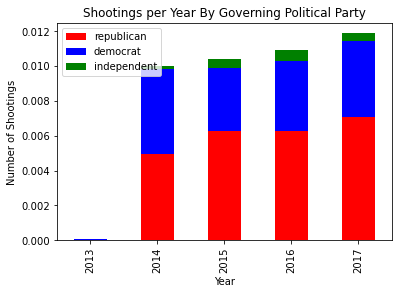

In [22]:
republican = [0,0,0,0,0]
democrat = [0,0,0,0,0]
independent = [0,0,0,0,0]

for key in dict_state_shootings_per_year:
    val = dict_state_shootings_per_year[key]
    i = 0
    while i < 5:
        if i == 0:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2013[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2013[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 1:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2014[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2014[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 2:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2015[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2015[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 3:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2016[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2016[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        elif i == 4:
            if key == "District of Columbia":
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Republican':
                republican[i] = republican[i] + val[i]
            elif dict_2017[key] == 'Democrat':
                democrat[i] = democrat[i] + val[i]
            elif dict_2017[key] == 'Independent':
                independent[i] = independent[i] + val[i]
        i+=1

index = ['2013', '2014', '2015', '2016', '2017']
df_year_party = pd.DataFrame({'republican': republican, 'democrat': democrat, 'independent':independent}, index=index)
ax = df_year_party.plot.bar(stacked=True, color={"republican":"red", "democrat":"blue", "independent":"green"}, title="Shootings per Year By Governing Political Party")
plt.legend(loc='upper left')
ax.set_xlabel("Year")
ax.set_ylabel("Number of Shootings")
ax.set

Here we display the number of shootings per year split by governing political party in a pyramid bar plot. This allows us to better visualize the data from the previous cell. We can now see that it is more obvious that republican governed states had more shootings than democrat governed states. We chose not to display independent governed states as the data was small and insignificant to the bigger picture. For 2014, the number of shootings between democrat and republican states seems to be about the same. However, for the years 2015, 2016, and 2017, republican governed states have more shootings than democrat states by a larger margin.

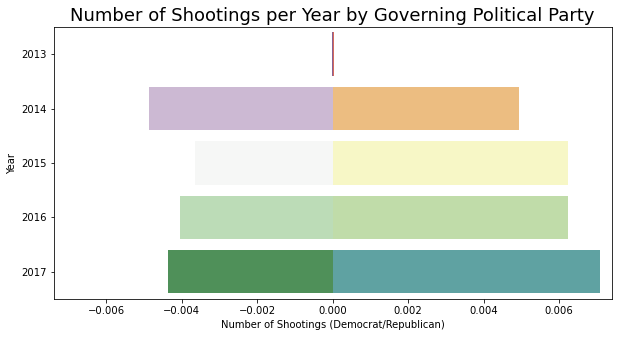

In [23]:
democrat = [-1*x for x in democrat]
plt.rcParams["figure.figsize"] = (10, 5)
df_party = pd.DataFrame({'Year': index, 
                    'Democrat': democrat, 
                    'Republican': republican})

#Class
YearClass = index
#Chart
bar_plot = sns.barplot(x='Democrat', y='Year', data=df_party, order=YearClass, lw=0, palette="PRGn")
bar_plot = sns.barplot(x='Republican', y='Year', data=df_party, order=YearClass, lw=0, palette="Spectral")
plt.xlim([-0.0074, 0.0074])
plt.title("Number of Shootings per Year by Governing Political Party", fontsize=18)
plt.xlabel("Number of Shootings (Democrat/Republican)")
plt.show()

Below we are adding to the df_age dataframe we created earlier to calculate the number of susppects per incident. Using helper functions, we are able to add total suspects, the list of suspects using their number values, suspects' age groups, number of teens, and number of adults for each incident.

In [24]:
# counting number of suspects for each incident:
def count(x):
    count = 0
#     print(x)
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count

def list_count(x):
    count = []
    for key in x:
        if x[key] == 'Subject-Suspect':
            count.append(key)
    return count

def make_groups(x):
    count = []
    for key in x:
        count.append(x[key])
    return count

def teen(x):
    count = 0
    for key in x:
        if x[key] == 'Teen 12-17':
            count += 1
    return count

def adult(x):
    count = 0
    for key in x:
        if x[key] == 'Adult 18+':
            count += 1
    return count


df_age['suspects_no'] = df_age['participant_type'].apply(count)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
df_age['suspect_age_groups'] = df_age['participant_age_group'].apply(make_groups)
df_age['suspect_teens'] = df_age['participant_age_group'].apply(teen)
df_age['suspect_adults'] = df_age['participant_age_group'].apply(adult)
df_age['combined'] = df_age.apply(lambda x: list([x['suspect_teens'],
                                        x['suspect_adults']]),axis=1) 
df_age

<ipython-input-24-ff7be581d569>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(count)
<ipython-input-24-ff7be581d569>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count)
<ipython-input-24-ff7be581d569>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_status,participant_type,state_house_district,state_senate_district,suspects_no,suspects_list,suspect_age_groups,suspect_teens,suspect_adults,combined
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,"0::Killed||1::Unharmed, Arrested||2::Unharmed,...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",91.0,33.0,2,"[1, 2]","[Adult 18+, Teen 12-17, Adult 18+]",1,2,"[1, 2]"
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},NaN,11.0,1,[0],[Adult 18+],0,1,"[0, 1]"
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,5.0,1,[1],"[Adult 18+, Teen 12-17]",1,1,"[1, 1]"
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,"0::Injured||1::Unharmed, Arrested","{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN,1,[1],"[Adult 18+, Adult 18+]",0,2,"[0, 2]"
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,0::Injured,{0: 'Victim'},71.0,16.0,0,[],[Adult 18+],0,1,"[0, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,0::Injured,{0: 'Victim'},67.0,23.0,0,[],[Teen 12-17],1,0,"[1, 0]"
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,"0::Unharmed, Arrested",{0: 'Subject-Suspect'},67.0,34.0,1,[0],[Adult 18+],0,1,"[0, 1]"
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,"0::Unharmed||1::Injured, Arrested||2::Unharmed...","{0: 'Victim', 1: 'Subject-Suspect', 2: 'Subjec...",84.0,25.0,2,"[1, 2]","[Teen 12-17, Teen 12-17]",2,0,"[2, 0]"
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,0::Injured||1::Unharmed,"{0: 'Victim', 1: 'Subject-Suspect'}",NaN,NaN,1,[1],[Adult 18+],0,1,"[0, 1]"


We are then using these new columns to calculate the total number of suspects and the number of suspects per age group for each incident. The method count_sus(x) and list_count_sus(x) return the total number of suspects and the list of all suspects for a particular incident. count_vic(x) and list_count_vic(x) do the the same but for victims. The make_groups() method iterates through each row in the suspects_list and participant_age_group and returns a list of all age_groups that map the suspects_list to the particular age group in that row. This idea is also used for other methods like teen(), adult_18_to_24(), ..., adult_76_plus(), which calculates the number of suspects that map to each of the sub age groups. Creating different age groups and mapping suspects into each of them will help us understand the distribution of this data more clearly.

In [26]:
def count_sus(x):
    count = 0
    for key in x:
        if x[key] == 'Subject-Suspect':
            count += 1
    return count

def list_count_sus(x):
    count = []
    for key in x:
        if x[key] == 'Subject-Suspect':
            count.append(key)
    return count

def count_vic(x):
    count = 0
    for key in x:
        if x[key] == 'Victim':
            count += 1
    return count

def list_count_vic(x):
    count = []
    for key in x:
        if x[key] == 'Victim':
            count.append(key)
    return count

def make_groups():
    total_count = []
    count = []
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age_group):
        count = []
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
#                 print(age_groups)
                count.append(age_groups[sus])
        total_count.append(count)
    return total_count

def teen():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age_group):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] == 'Teen 12-17':
                    count += 1
        total_count.append(count)
    return total_count

def adult_18_to_24():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 18 and age_groups[sus] <= 24:
                    count += 1
        total_count.append(count)
    return total_count

def adult_25_to_40():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 25 and age_groups[sus] <= 40:
                    count += 1
        total_count.append(count)
    return total_count

def adult_41_to_56():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 41 and age_groups[sus] <= 56:
                    count += 1
        total_count.append(count)
    return total_count

def adult_57_to_66():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 57 and age_groups[sus] <= 66:
                    count += 1
        total_count.append(count)
    return total_count

def adult_67_to_75():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 67 and age_groups[sus] <= 75:
                    count += 1
        total_count.append(count)
    return total_count

def adult_76_plus():
    total_count = []
    count = 0
    for suspects,age_groups in zip(df_age.suspects_list, df_age.participant_age):
        count = 0
        for sus in suspects:
            if len(age_groups) > sus and sus in age_groups:
                if age_groups[sus] >= 76:
                    count += 1
        total_count.append(count)
    return total_count

# suspects
df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
df_age['suspect_age_groups'] = make_groups()
df_age['suspect_teens'] = teen()
df_age['suspect_18-24'] = adult_18_to_24()
df_age['suspect_25-40'] = adult_25_to_40()
df_age['suspect_41-56'] = adult_41_to_56()
df_age['suspect_57-66'] = adult_57_to_66()
df_age['suspect_67-75'] = adult_67_to_75()
df_age['suspect_76'] = adult_76_plus()

df_age

<ipython-input-26-83ae928bb04b>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_no'] = df_age['participant_type'].apply(count_sus)
<ipython-input-26-83ae928bb04b>:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['suspects_list'] = df_age['participant_type'].apply(list_count_sus)
<ipython-input-26-83ae928bb04b>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,suspect_age_groups,suspect_teens,suspect_adults,combined,suspect_18-24,suspect_25-40,suspect_41-56,suspect_57-66,suspect_67-75,suspect_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,"[Teen 12-17, Adult 18+]",1,2,"[1, 2]",1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,[Adult 18+],0,1,"[0, 1]",0,1,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,[Teen 12-17],1,1,"[1, 1]",0,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,[Adult 18+],0,2,"[0, 2]",0,0,0,0,1,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,[],0,1,"[0, 1]",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,[],0,0,"[1, 0]",0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,[Adult 18+],0,1,"[0, 1]",1,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,[Teen 12-17],1,0,"[2, 0]",0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,[],0,1,"[0, 1]",0,0,0,0,0,0


We then calculate the sum of suspect teens and other age groups for all incidents in total. This will be used to graph the age groups with the number of suspects per age group. Below is the barplot that shows this distribution. As seen below, the age group 25-40 has the highest number of suspects for all incidents in the year of 2017, while the age group 76+ has the lowest.

Teens :  2897
18-24 :  9067
25-40 :  10841
41-56 :  3169
57-66 :  752
67-75 :  238
75+ :  108
Total :  26320


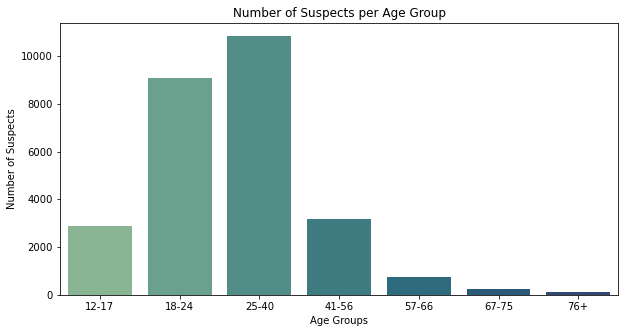

In [27]:
total_teens = df_age.loc[:, 'suspect_teens'].sum()
total_18_24 = df_age.loc[:, 'suspect_18-24'].sum()
total_25_40 = df_age.loc[:, 'suspect_25-40'].sum()
total_41_56 = df_age.loc[:, 'suspect_41-56'].sum()
total_57_66 = df_age.loc[:, 'suspect_57-66'].sum()
total_67_75 = df_age.loc[:, 'suspect_67-75'].sum()
total_75_plus = df_age.loc[:, 'suspect_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="crest")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Suspects")
plt.title("Number of Suspects per Age Group")
plt.rcParams.update({'font.size': 20})
plt.show()

The following code is a replica to the code above but calculates the number of victims for each incident instead.

In [28]:
def make_groups():
    total_count = []
    count = []
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age_group):
        count = []
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                count.append(age_groups[vic])
        total_count.append(count)
    return total_count

def teen():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age_group):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] == 'Teen 12-17':
                    count += 1
        total_count.append(count)
    return total_count

def adult_18_to_24():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 18 and age_groups[vic] <= 24:
                    count += 1
        total_count.append(count)
    return total_count

def adult_25_to_40():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 25 and age_groups[vic] <= 40:
                    count += 1
        total_count.append(count)
    return total_count

def adult_41_to_56():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 41 and age_groups[vic] <= 56:
                    count += 1
        total_count.append(count)
    return total_count

def adult_57_to_66():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 57 and age_groups[vic] <= 66:
                    count += 1
        total_count.append(count)
    return total_count

def adult_67_to_75():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 67 and age_groups[vic] <= 75:
                    count += 1
        total_count.append(count)
    return total_count

def adult_76_plus():
    total_count = []
    count = 0
    for victims,age_groups in zip(df_age.victims_list, df_age.participant_age):
        count = 0
        for vic in victims:
            if len(age_groups) > vic and vic in age_groups:
                if age_groups[vic] >= 76:
                    count += 1
        total_count.append(count)
    return total_count

# victims
df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
df_age['victim_age_groups'] = make_groups()
df_age['victim_teens'] = teen()
df_age['victim_18-24'] = adult_18_to_24()
df_age['victim_25-40'] = adult_25_to_40()
df_age['victim_41-56'] = adult_41_to_56()
df_age['victim_57-66'] = adult_57_to_66()
df_age['victim_67-75'] = adult_67_to_75()
df_age['victim_76'] = adult_76_plus()

df_age

<ipython-input-28-69d52eba6d9d>:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_no'] = df_age['participant_type'].apply(count_vic)
<ipython-input-28-69d52eba6d9d>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['victims_list'] = df_age['participant_type'].apply(list_count_vic)
<ipython-input-28-69d52eba6d9d>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,victims_no,victims_list,victim_age_groups,victim_teens,victim_18-24,victim_25-40,victim_41-56,victim_57-66,victim_67-75,victim_76
164474,740176,2017-01-01,Tennessee,Memphis,3000 block of Danville Road,1,0,http://www.gunviolencearchive.org/incident/740176,http://www.wmcactionnews5.com/story/34179388/2...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164475,741857,2017-01-01,Nebraska,Omaha,N 24th St and Sprague St,0,0,http://www.gunviolencearchive.org/incident/741857,http://www.wowt.com/content/news/New-Years-cel...,False,...,0,[],[],0,0,0,0,0,0,0
164476,741852,2017-01-01,Nebraska,Omaha,S 27th St and Polk St,0,1,http://www.gunviolencearchive.org/incident/741852,http://www.wowt.com/content/news/Teen-arrested...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
164477,740911,2017-01-01,Pennsylvania,Erie,2134 Glendale Ave,0,1,http://www.gunviolencearchive.org/incident/740911,http://www.erienewsnow.com/story/34164013/71-y...,False,...,1,[0],[Adult 18+],0,0,0,0,1,0,0
164479,740240,2017-01-01,Virginia,Richmond,2800 block of Fairfield Ave,0,1,http://www.gunviolencearchive.org/incident/740240,http://wric.com/2017/01/02/man-shot-inside-his...,False,...,1,[0],[Adult 18+],0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225862,1021943,2017-12-31,Alabama,Selma,300 block of Gaines Avenue,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.selmatimesjournal.com/2018/01/02/fo...,False,...,1,[0],[Teen 12-17],1,0,0,0,0,0,0
225864,1018580,2017-12-31,Illinois,Rockford,1100 Greenwood Ave,0,0,http://www.gunviolencearchive.org/incident/101...,http://www.rrstar.com/news/20180101/rockford-t...,False,...,0,[],[],0,0,0,0,0,0,0
225868,1020900,2017-12-31,Florida,Fort Pierce,601 N 25th St,0,1,http://www.gunviolencearchive.org/incident/102...,http://www.tcpalm.com/story/news/crime/st-luci...,False,...,1,[0],[],0,0,0,0,0,0,0
225873,1018101,2017-12-31,Illinois,Chicago,1900 S Sawyer Ave,0,1,http://www.gunviolencearchive.org/incident/101...,https://chicago.suntimes.com/news/man-wounded-...,False,...,1,[0],[Adult 18+],0,0,1,0,0,0,0


Like the suspects, we calculate the sum of victim teens and the other age groups for all incidents in total. This will be used to graph the age groups with the number of victims per age group. Below is the barplot that shows this distribution. As seen below, the age group 25-40 has the highest number of victims for all incidents in the year of 2017, while the age group 76+ has the lowest. This graph is very similar to the distribution for suspects, although the data count varies between the two, which is interesting to see.

Teens :  2794
18-24 :  8030
25-40 :  10647
41-56 :  3331
57-66 :  934
67-75 :  381
75+ :  190
Total :  25373


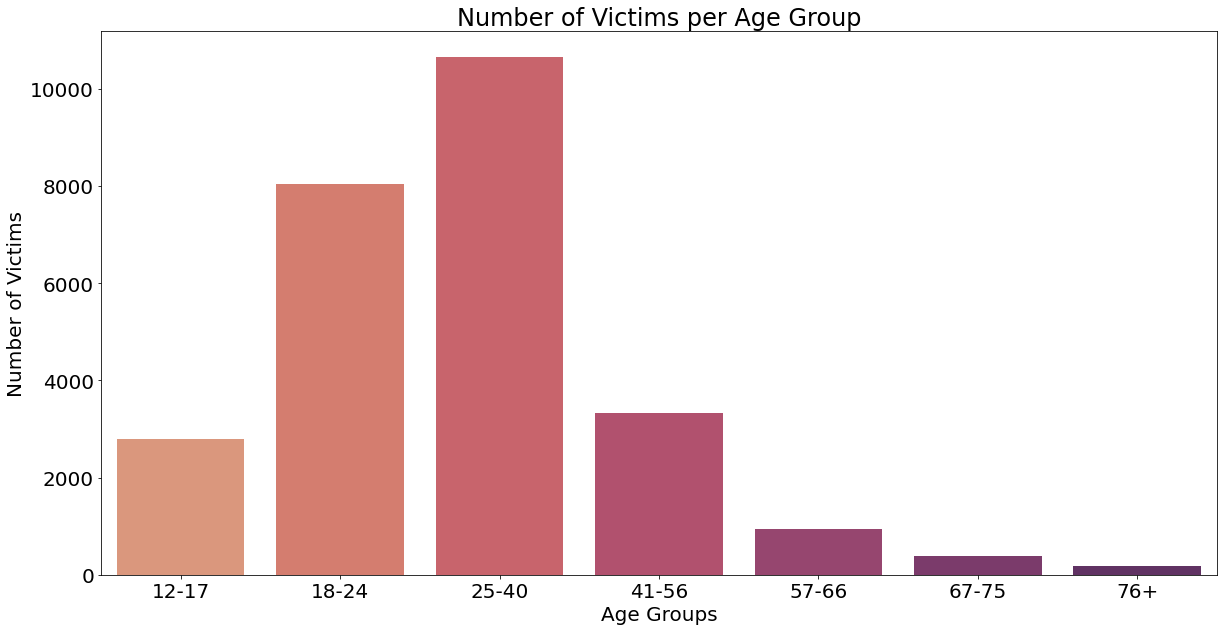

In [29]:
plt.figure()
total_teens = df_age.loc[:, 'victim_teens'].sum()
total_18_24 = df_age.loc[:, 'victim_18-24'].sum()
total_25_40 = df_age.loc[:, 'victim_25-40'].sum()
total_41_56 = df_age.loc[:, 'victim_41-56'].sum()
total_57_66 = df_age.loc[:, 'victim_57-66'].sum()
total_67_75 = df_age.loc[:, 'victim_67-75'].sum()
total_75_plus = df_age.loc[:, 'victim_76'].sum()
print("Teens : ", total_teens)
print("18-24 : ", total_18_24)
print("25-40 : ", total_25_40)
print("41-56 : ", total_41_56)
print("57-66 : ", total_57_66)
print("67-75 : ", total_67_75)
print("75+ : ", total_75_plus)
print("Total : ", total_teens+total_18_24+total_25_40+total_41_56+total_67_75+total_75_plus)
sns.barplot(x=['12-17', '18-24', '25-40', '41-56',
              '57-66', '67-75', '76+'], 
            y=[total_teens, total_18_24, total_25_40, total_41_56, total_57_66, total_67_75, total_75_plus], 
            palette="flare")
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Age Groups")
plt.ylabel("Number of Victims")
plt.title("Number of Victims per Age Group")
plt.rcParams.update({'font.size': 20})
plt.show()

In [33]:
def count_incidents(x):
    temp = pd.DataFrame(columns = ['state', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    states = sorted(list(df_2017.state.unique()))
    months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    for i in states: 
        state_df = x[x.state == i] #dataframe for each state
        dict = {'state': i, 'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0} #what we want for that state
        for j in months.keys():
            count = 0
            for index, row in state_df.iterrows():
                if row['date'].month == j: 
                    count = count + 1
                dict[months[j]] = count
        temp = temp.append(dict, ignore_index=True)
    
    return temp
    
df_2013_2018["date"] = pd.to_datetime(df_2013_2018["date"])
numincidents_2013 = count_incidents(df_2013_2018[df_2013_2018['date'].dt.year == int(2013)])
numincidents_2014 = count_incidents(df_2013_2018[df_2013_2018['date'].dt.year == int(2014)])
numincidents_2015 = count_incidents(df_2013_2018[df_2013_2018['date'].dt.year == int(2015)])
numincidents_2016 = count_incidents(df_2013_2018[df_2013_2018['date'].dt.year == int(2016)])
numincidents_2017 = count_incidents(df_2013_2018[df_2013_2018['date'].dt.year == int(2017)])

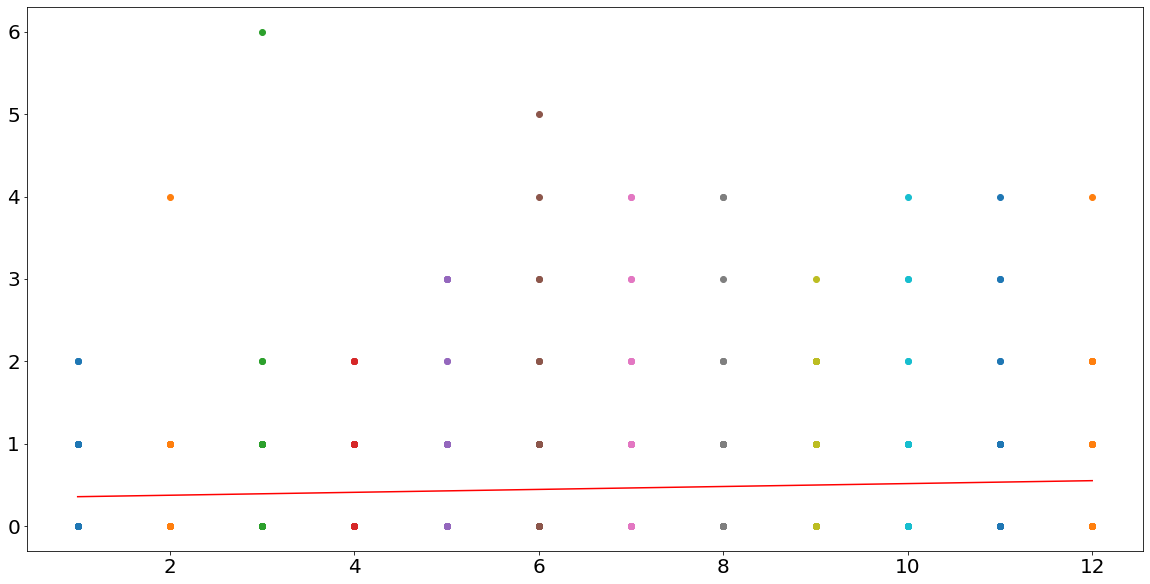

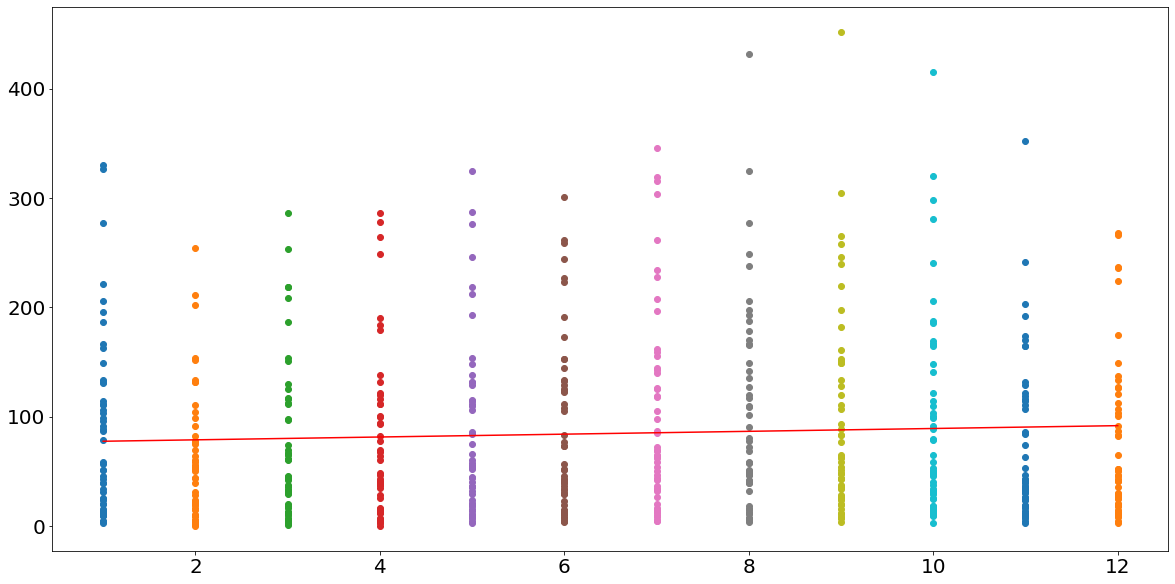

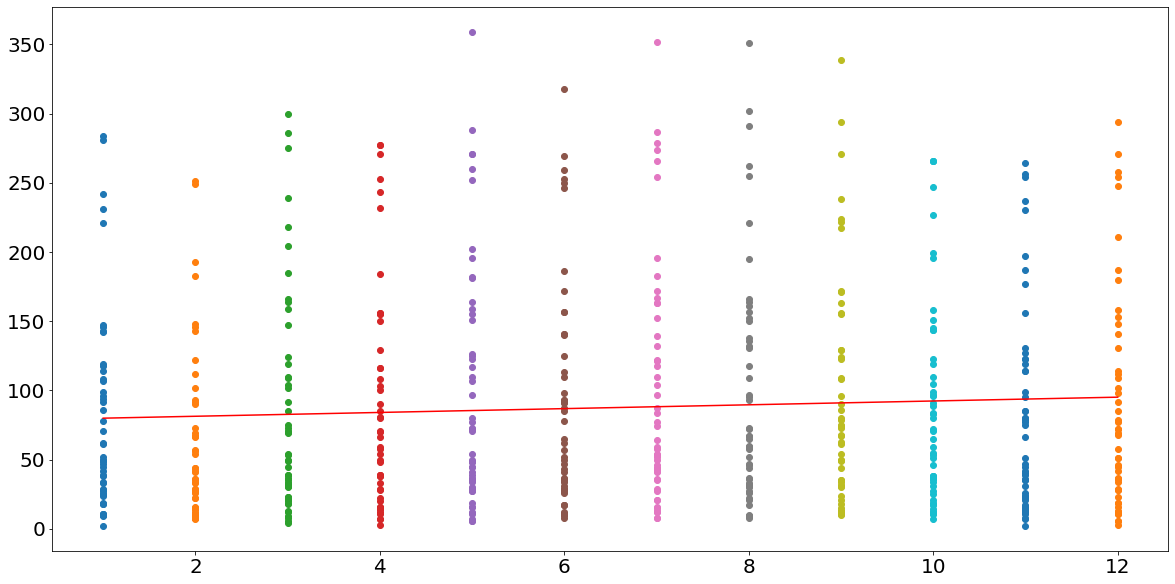

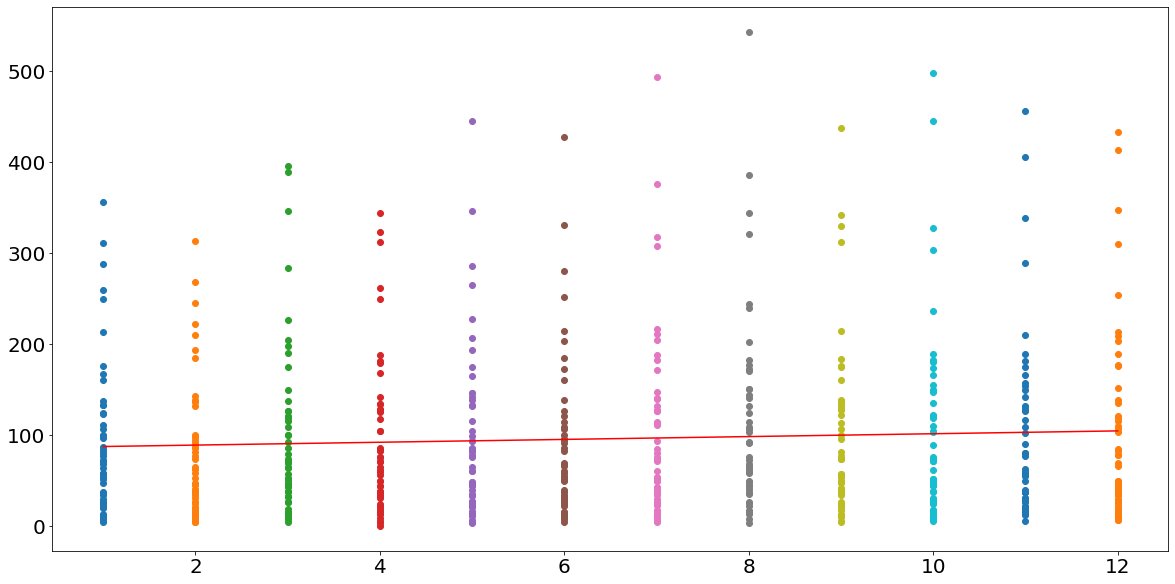

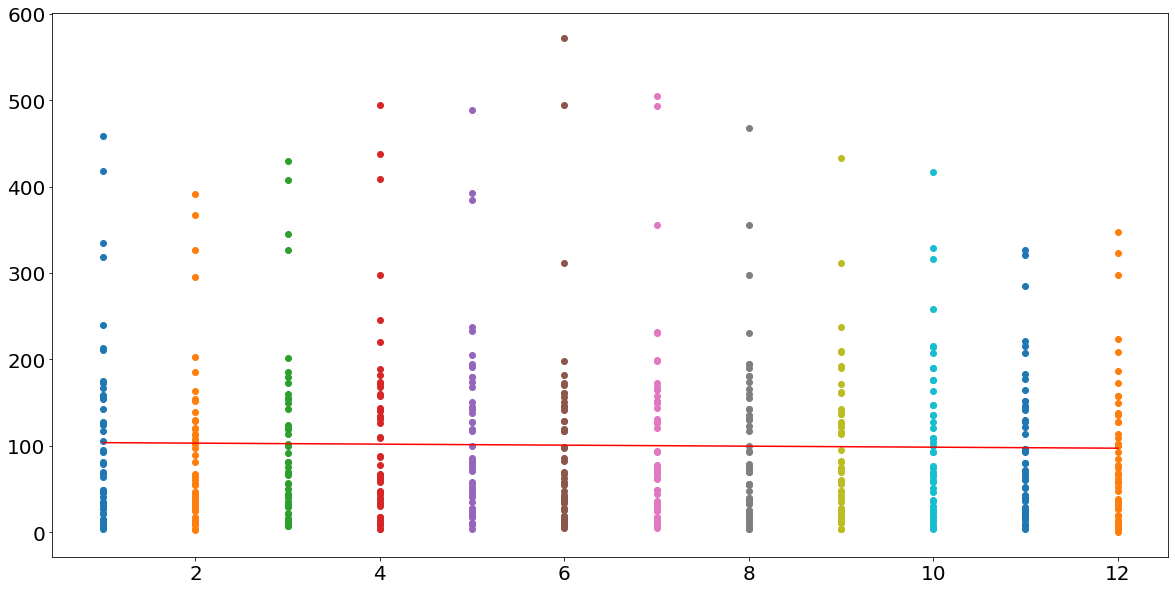

In [34]:
from sklearn.linear_model import LinearRegression
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

def scatter_and_regress(x):
    m = np.array([])
    n = np.array([])
    plt.figure()
    for i in range(1, 13):
        m = np.append(m, np.repeat(i, 51))
        n = np.append(n, x[months[i]].values.tolist())
        plt.scatter(np.repeat(i, 51), x[months[i]].values.tolist())
    
    x = m.reshape(-1, 1)
    y = n.reshape(-1, 1)
    linreg = LinearRegression()
    linreg.fit(x,y)
    coeff = linreg.coef_[0,0]
    intercept = linreg.intercept_[0]    
    plt.plot(x, coeff*x+intercept, c='red')
    plt.show()

scatter_and_regress(numincidents_2013)
scatter_and_regress(numincidents_2014)
scatter_and_regress(numincidents_2015)
scatter_and_regress(numincidents_2016)
scatter_and_regress(numincidents_2017)

In [35]:
# total incidents for each state in each year
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
numincidents_2013['Total'] = numincidents_2013.loc[0 : 51,months_list].sum(axis = 1)
numincidents_2014['Total'] = numincidents_2014.loc[0 : 51,months_list].sum(axis = 1)
numincidents_2015['Total'] = numincidents_2015.loc[0 : 51,months_list].sum(axis = 1)
numincidents_2016['Total'] = numincidents_2016.loc[0 : 51,months_list].sum(axis = 1)
numincidents_2017['Total'] = numincidents_2017.loc[0 : 51,months_list].sum(axis = 1)

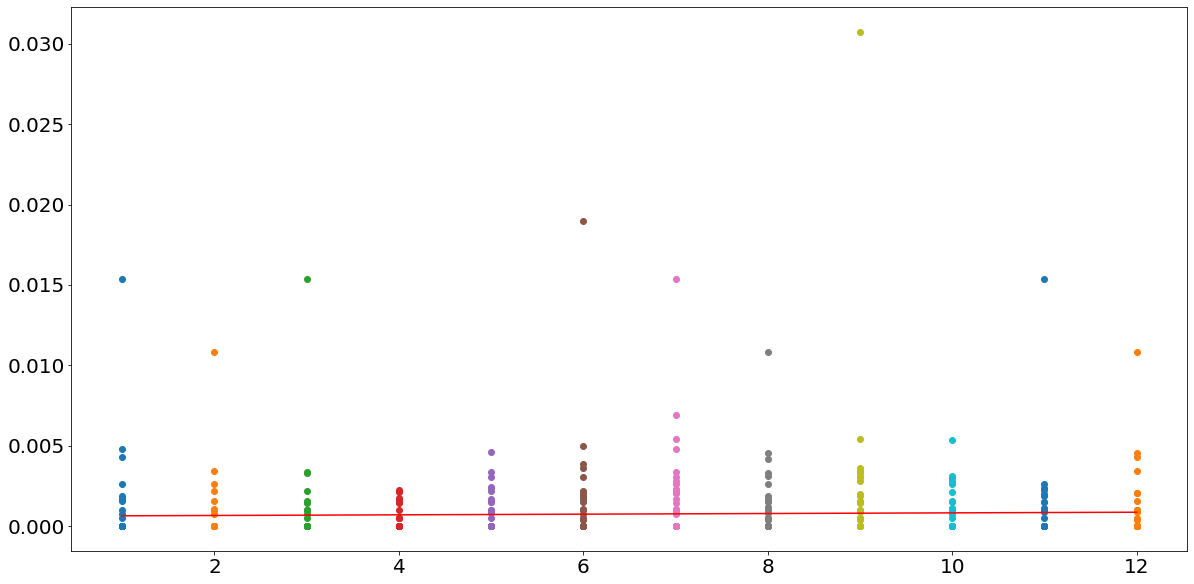

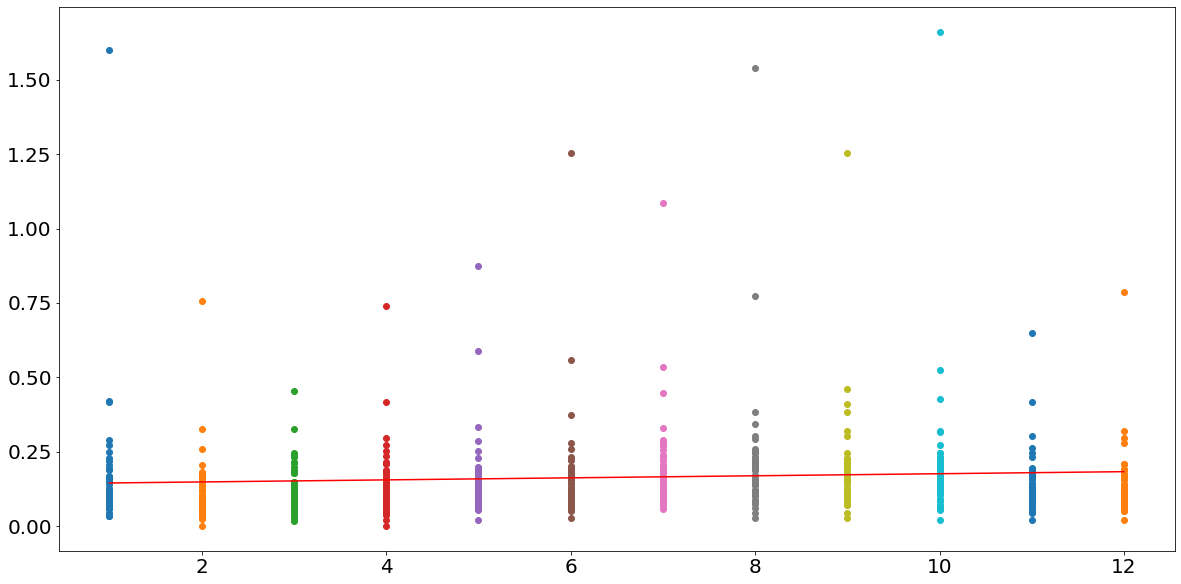

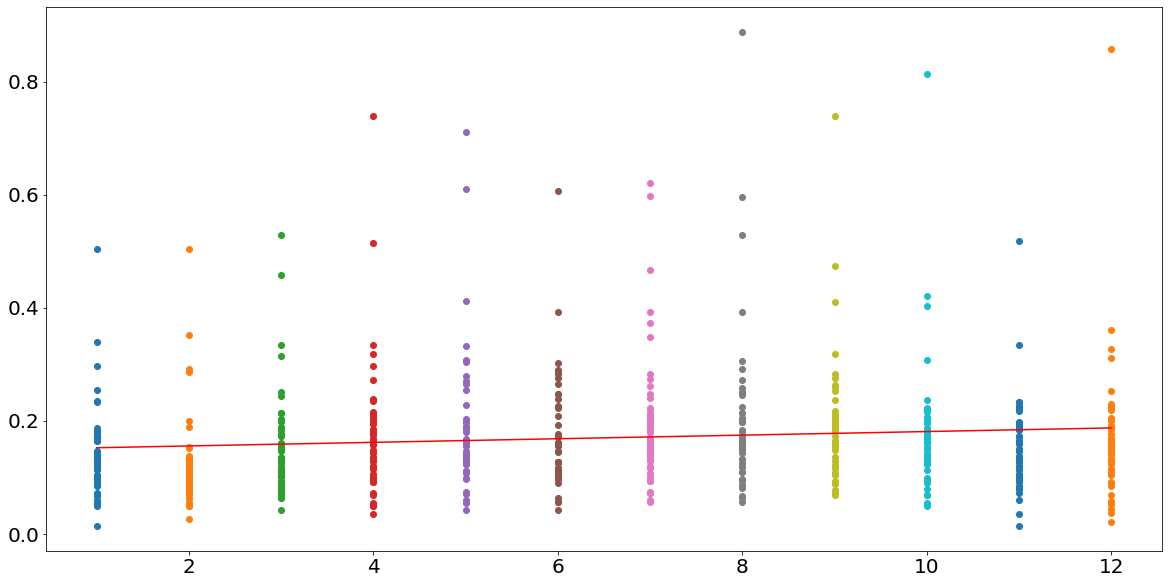

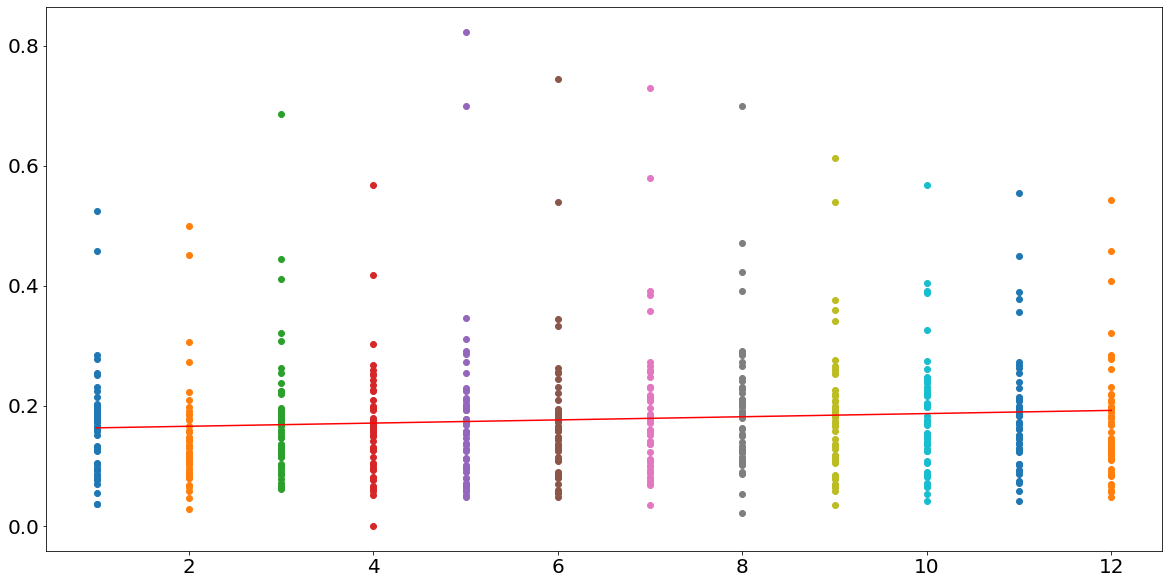

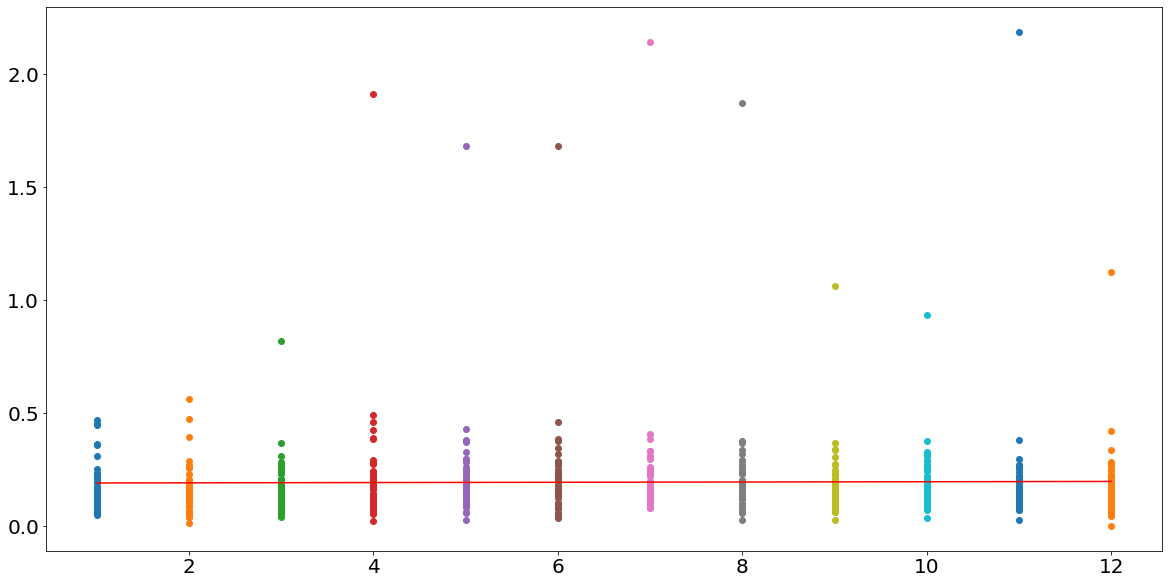

In [36]:
def normalize(x, year):
    norm = pd.DataFrame()
    norm['state'] = x['state']
    for i in months_list:
        norm[i] = x[i]/df_populations[year]*10000
    return norm 

numincidents_2013_normalized = normalize(numincidents_2013, '2013')
numincidents_2014_normalized = normalize(numincidents_2014, '2014')
numincidents_2015_normalized = normalize(numincidents_2015, '2015')
numincidents_2016_normalized = normalize(numincidents_2016, '2016')
numincidents_2017_normalized = normalize(numincidents_2017, '2017')

scatter_and_regress(numincidents_2013_normalized)
scatter_and_regress(numincidents_2014_normalized)
scatter_and_regress(numincidents_2015_normalized)
scatter_and_regress(numincidents_2016_normalized)
scatter_and_regress(numincidents_2017_normalized)

In [37]:
# #if we want fancy lookin violinplots 
# deaths_per_month = []
# months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# for i in range(1, 13):numincidents_2017[months[i]].values.tolist()
#     temp = 
#     deaths_per_month.append(temp)

    
# m = [i for i in range(1, 13)]
# fig, ax = plt.subplots()
# ax.violinplot(deaths_per_month,m,widths=0.5,showmeans=True)

# type(deaths_per_month[1])